In [1]:
import numpy as np
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph, planted_partition_graph,random_partition_graph
from networkx.algorithms import community
import os
import math

import functools

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from itertools import islice

In [ ]:
seed_set = [2, 34,56]

In [ ]:
# obtain the size of 334863

In [3]:
groundtruth_filename = '/home/sfy/Documents/VScodeProject/SNAPro/dataset/com-amazon.all.dedup.cmty.txt'
groundtruth_df = pd.read_csv(groundtruth_filename, delimiter="a", names=["list"], comment='#')


In [5]:
groundtruth_df.head(10)

,list
0,100005\t127545\t202036\t257630\t362970\t376927...
1,10001\t27638\t51569\t88226\t116422\t126227\t15...
2,10001\t27638\t51569\t88226\t116422\t126227\t15...
3,100017\t118111\t263647\t268405\t315862
4,100020\t267700\t301658\t376628\t410518\t464375
5,100022\t298856\t412978\t472429
6,100025\t179592\t260929\t464366
7,100025\t260929\t328722\t411257
8,100025\t286364\t301821\t316953\t421421\t467329...
9,100030\t106036\t209079\t289843


In [ ]:
groundtruth_df.list = groundtruth_df.list.str.split('\t')
groundtruth = [[int(i) for i in row.list] for i, row in groundtruth_df.iterrows()]

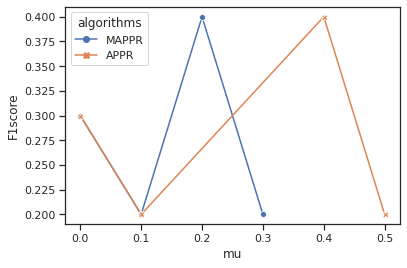

In [35]:
sns.set_theme(style="ticks")
sns.lineplot(data = resultDF,x='mu',y='F1score',hue= 'algorithms',style='algorithms',markers=True,dashes=False)

plt.savefig('test.png')